# Feature Match

Feature matches.

Brute force matcher with distance between 2 pairs of features.

Distance indicates **similarity**.

Floating point type -> Euclidean distance

Binary descriptors (BRIEF) -> Hamming distance

$$d_{\text{hamming}}(a,b)=\sum^{n-1}_{i=0}(a_i \oplus b_i)$$

Brute-force matching is too slow in real-time. Use FLANN: Fast Approximate Nearest Neighbour.

Worst distance:  80.0
Best distance:  7.0


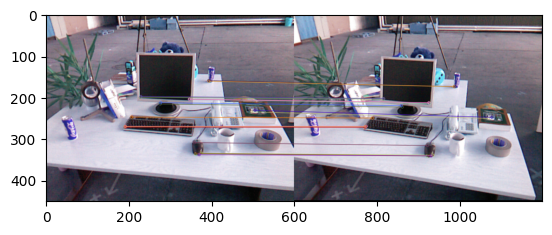

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


im1 = cv2.imread('desk1.png')
im2 = cv2.imread('desk2.png')

grayimg1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
grayimg2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(grayimg1, None)
keypoints2, descriptors2 = orb.detectAndCompute(grayimg2, None)

# use brute force matching Hamming
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(descriptors1, descriptors2)
# sort matches
matches = sorted(matches, key = lambda x:x.distance)
worst_match = matches[-1]
best_match = matches[0]
print("Worst distance: ", worst_match.distance)
print("Best distance: ",best_match.distance)
# draw matches
img_with_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_with_matches)
plt.show()

# FLANN-based matching



To filter matches, Lowes propose a distance ratio test to filter out false matches.

Distance ratio = distance with 1st nearest neighbour vs distance with 2nd nearest neighbour

Ambiguous (incorrect) matches likely have distance ratio of 1.

Additional filtering tests:
- cross check test
- RANSAC test

In [7]:
minHessian=400
detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)

# only works on SURF and SIFT features
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)

# filter matches with Lowe's ratio test
ratio_thresh = 0.7
good_matches = []
for m,n in knn_matches: # pair of matches
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)

img_matches = np.empty((max(im1.shape[0], im2.shape[0]), im1.shape[1]+im2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(im1, keypoints1, im2, keypoints2, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Show detected matches
plt.imshow(img_matches)
plt.show()

error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1028: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'
